# Job Market Analysis

TODO List: 

    - Finding the missing values
    - Finding unique values in each column
    - Data cleaning
    - Descripitive statistices on cleaned data
    - Finding the correlations
    - Bivariate Analysis
    - Summary


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Preparation and Cleaning
1) Load the file using Pandas

2) Look at some information about the date and the columns

3) Fix any missing or incorrect values

In [2]:
df = pd.read_csv("naukri_com-job_sample.csv")
df

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Morgan Stanley Advantage Services Pvt. Ltd.,UG: Any Graduate - Any Specialization,9 - 13 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this Greet...,241116007152,Bengaluru,Quality Assurance - VP with Morgan Stanley Ban...,2.0,Not Disclosed by Recruiter,2016-11-25 22:47:05 +0000,www.naukri.com,IT Software - QA & Testing,ef40136e3b0c0abdab695d979a4b7153
21996,Careernet Technologies Pvt Ltd hiring for Client,UG: B.Tech/B.E. - Any Specialization PG:M.Tech...,3 - 5 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Looki...,241116001104,"Bengaluru, Gurgaon",Java Backend Developers for a Product Company,NaN,"8,50,000 - 14,00,000 P.A",2016-11-24 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,acb80b7bb109fa76d22d1f11c6e16c6a
21997,Musk - Startup,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,2 - 4 yrs,Internet / Ecommerce,Job Description Send me Jobs like this Work ...,251116900644,Bengaluru,Full Stack Development Engineer,NaN,Not Disclosed by Recruiter,2016-11-25 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,f6f2885a6c87572616fb766029a0d284
21998,Confidential,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,7 - 12 yrs,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,231116901329,"Delhi NCR, Bengaluru",Sr UI Developer/ Technical Lead - Html/ CSS/ J...,NaN,Not Disclosed by Recruiter,2016-11-27 22:47:05 +0000,www.naukri.com,IT Software - Application Programming,c6f6538cb1007dd02c1b4b77909b3d38


In [3]:
df.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

In [4]:
df.shape

(22000, 14)

In [5]:
count_missing = df.isnull().sum()
count_missing

company                    4
education               1996
experience                 4
industry                   5
jobdescription             4
jobid                      0
joblocation_address      501
jobtitle                   0
numberofpositions      17536
payrate                   97
postdate                  23
site_name              18013
skills                   528
uniq_id                    0
dtype: int64

In [6]:
percent_missing = count_missing * 100/len(df)
percent_missing

company                 0.018182
education               9.072727
experience              0.018182
industry                0.022727
jobdescription          0.018182
jobid                   0.000000
joblocation_address     2.277273
jobtitle                0.000000
numberofpositions      79.709091
payrate                 0.440909
postdate                0.104545
site_name              81.877273
skills                  2.400000
uniq_id                 0.000000
dtype: float64

In [7]:
missing_value_df = pd.DataFrame({'count_missing' : count_missing, 'percent_missing' : percent_missing})

missing_value_df.style.background_gradient(cmap = 'Spectral')

,count_missing,percent_missing
company,4,0.018182
education,1996,9.072727
experience,4,0.018182
industry,5,0.022727
jobdescription,4,0.018182
jobid,0,0.000000
joblocation_address,501,2.277273
jobtitle,0,0.000000
numberofpositions,17536,79.709091
payrate,97,0.440909


In [8]:
# Finding the total number of unique values in each column

for col in df.columns:
    print("{} has {} values".format(col, df[col].nunique()))

company has 8469 values
education has 2355 values
experience has 147 values
industry has 63 values
jobdescription has 21063 values
jobid has 21910 values
joblocation_address has 2329 values
jobtitle has 17564 values
numberofpositions has 84 values
payrate has 1848 values
postdate has 4203 values
site_name has 1 values
skills has 45 values
uniq_id has 22000 values


In [9]:
# Unique values in each column

unique_df = [[col,df[col].nunique(), df[col].unique()] for col in df.columns]

In [10]:
count_df = pd.DataFrame(unique_df, columns = ['col_name', 'count', 'unique'])

In [11]:
count_df.style.background_gradient(cmap = 'Spectral')

## Exploratory Analysis and Visualization

Columns which are analyzed below:

1) Payrate

2) Experience

3) Postdate

4) Industry

5) Job title

6) Number of positions

7) Skills

### Payrate Column

In [12]:
df.payrate.head(20)

0                               1,50,000 - 2,25,000 P.A
1                        1,50,000 - 2,50,000 P.A. 20000
2                            Not Disclosed by Recruiter
3                            Not Disclosed by Recruiter
4                            Not Disclosed by Recruiter
5                            Not Disclosed by Recruiter
6                               3,00,000 - 6,50,000 P.A
7                            Not Disclosed by Recruiter
8                               1,00,000 - 2,00,000 P.A
9                            Not Disclosed by Recruiter
10                           Not Disclosed by Recruiter
11                           Not Disclosed by Recruiter
12                              1,75,000 - 2,50,000 P.A
13                           Not Disclosed by Recruiter
14                           Not Disclosed by Recruiter
15                           Not Disclosed by Recruiter
16    1,00,000 - 2,00,000 P.A. incentives for achiev...
17                              1,00,000 - 5,00,

In [13]:
# minimum pay of first payrate
df['payrate'][0].split('-')[0]

'1,50,000 '

In [14]:
# maximum pay of first payrate
df['payrate'][0].split('-')[1]

' 2,25,000 P.A'

In [15]:
len_pay = []
for pay in df['payrate']:
    len_pay.append(len(str(pay).split('-')))

In [16]:
# payrate column should have only 2 elements, one for minimum and one for maximum.
# less than 2 or more than 2 are useless for payrate column which will be taken care.

pd.Series(len_pay).value_counts()

1    17028
2     4682
4      126
3       83
5       54
6       24
7        3
dtype: int64

In [17]:
# Handling the extra elements of payrate column

payrate_split = df["payrate"].str.split('-', expand = True)

In [18]:
payrate_split

# Out of these 7 columns, only 0th and 1st column makes sense because only these 2 columns has minimum and maximum pay.
# rest of the columns are useless.

,0,1,2,3,4,5,6
0,"1,50,000","2,25,000 P.A",None,None,None,None,None
1,"1,50,000","2,50,000 P.A. 20000",None,None,None,None,None
2,Not Disclosed by Recruiter,None,None,None,None,None,None
3,Not Disclosed by Recruiter,None,None,None,None,None,None
4,Not Disclosed by Recruiter,None,None,None,None,None,None
...,...,...,...,...,...,...,...
21995,Not Disclosed by Recruiter,None,None,None,None,None,None
21996,"8,50,000","14,00,000 P.A",None,None,None,None,None
21997,Not Disclosed by Recruiter,None,None,None,None,None,None
21998,Not Disclosed by Recruiter,None,None,None,None,None,None


In [19]:
payrate_split[0][0]

'1,50,000 '

In [20]:
# Need to remove the extra space which is on the right side

In [21]:
payrate_split[0] = payrate_split[0].str.strip()

In [22]:
payrate_split[0][0]

'1,50,000'

In [23]:
# Now need to replace commas

payrate_split[0] = payrate_split[0].apply(lambda x : str(x).replace(',', ''))

In [24]:
payrate_split[0]

0                            150000
1                            150000
2        Not Disclosed by Recruiter
3        Not Disclosed by Recruiter
4        Not Disclosed by Recruiter
                    ...            
21995    Not Disclosed by Recruiter
21996                        850000
21997    Not Disclosed by Recruiter
21998    Not Disclosed by Recruiter
21999                       1200000
Name: 0, Length: 22000, dtype: object

In [25]:
# Getting the numeric values only and rest will be NaN.

pd.to_numeric(payrate_split[0], errors = "coerce")

0         150000.0
1         150000.0
2              NaN
3              NaN
4              NaN
           ...    
21995          NaN
21996     850000.0
21997          NaN
21998          NaN
21999    1200000.0
Name: 0, Length: 22000, dtype: float64

In [26]:
# Other way of getting numeric values only and rest would be blank.

pattern = '\D.*'

payrate_split[0].str.replace(pattern, '')

0         150000
1         150000
2               
3               
4               
          ...   
21995           
21996     850000
21997           
21998           
21999    1200000
Name: 0, Length: 22000, dtype: object

In [27]:
# removing extra space in column 1 now

payrate_split[1] = payrate_split[1].str.strip()

In [28]:
# Replacing commas

payrate_split[1] = payrate_split[1].apply(lambda x : str(x).replace(',', ''))

In [29]:
# Replacing set of characters

pattern = '\D.*'
payrate_split[1] = payrate_split[1].str.replace(pattern, '')

In [30]:
payrate_split[1]

0         225000
1         250000
2               
3               
4               
          ...   
21995           
21996    1400000
21997           
21998           
21999    2200000
Name: 1, Length: 22000, dtype: object

In [31]:
# Checking for its Data types

payrate_split.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object

In [32]:
# Converting columns 0 and 1 into numeric

payrate_split[0] = pd.to_numeric(payrate_split[0], errors = 'coerce')
payrate_split[1] = pd.to_numeric(payrate_split[1], errors = 'coerce')

In [33]:
payrate_split.dtypes

0    float64
1    float64
2     object
3     object
4     object
5     object
6     object
dtype: object

In [34]:
# Now use 0 and 1 columns and concatenate them

pay = pd.concat([payrate_split[0], payrate_split[1]], axis = 1, sort = False)

In [35]:
pay.columns = ['min_pay', 'max_pay']

In [36]:
pay

,min_pay,max_pay
0,150000.0,225000.0
1,150000.0,250000.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
21995,NaN,NaN
21996,850000.0,1400000.0
21997,NaN,NaN
21998,NaN,NaN


In [37]:
# Now concatenating the df and pay

df = pd.concat([df, pay], axis = 1, sort = False)

In [38]:
df.head(3)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN


### Experience Column

In [39]:
df.experience

0          0 - 1 yrs
1          0 - 0 yrs
2          4 - 8 yrs
3        11 - 15 yrs
4          6 - 8 yrs
            ...     
21995     9 - 13 yrs
21996      3 - 5 yrs
21997      2 - 4 yrs
21998     7 - 12 yrs
21999     5 - 10 yrs
Name: experience, Length: 22000, dtype: object

In [40]:
df.experience[0]

'0 - 1 yrs'

In [41]:
value = df.experience[0]

In [42]:
value.split("-")

['0 ', ' 1 yrs']

In [43]:
# minimum experience
value.split("-")[0]

'0 '

In [44]:
# maximum experience

value.split("-")[1]

' 1 yrs'

In [45]:
def split_exp(exp):
    min_exp = exp.split("-")[0]
    max_exp = exp.split("-")[1]
    return min_exp, max_exp

In [46]:
split_exp(value)

('0 ', ' 1 yrs')

In [47]:
# Checking for some inadequate values in experience column
len1 = []
for exp in df["experience"].dropna():
    if len(exp.split("-")) != 2:
        len1.append(exp)

In [48]:
len1

['Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Mentioned',
 'Not Ment

In [49]:
# The use of try and except for adequate values of experience column. 

def split_exp2(exp):
    try:
        if len(exp.split('-')) == 2:
            min_exp = exp.split("-")[0]
            max_exp = exp.split("-")[1]
        return pd.Series([min_exp, max_exp])
    except:
        return pd.Series([np.nan, np.nan])

In [50]:
# Here, 0th column is the minimum experience and 1st colum is the maximum experience

df[["min_exp", "max_exp"]] = df["experience"].apply(split_exp2).rename(columns = {0 : "min_exp", 1 : "max_exp"})

In [51]:
# Checking for the "not mentioned" values now

not_mentioned = pd.DataFrame(df["experience"].str.contains("Not Mentioned"))
not_mentioned[not_mentioned["experience"] == True]

,experience
1138,True
5167,True
7193,True
7195,True
7206,True
...,...
21295,True
21315,True
21397,True
21430,True


In [52]:
# Indexes where "Not mentioned" is available

not_mentioned[not_mentioned["experience"] == True].index

Int64Index([ 1138,  5167,  7193,  7195,  7206,  7296,  7385,  7452,  7467,
             7555,
            ...
            12988, 12998, 14404, 20342, 20562, 21295, 21315, 21397, 21430,
            21584],
           dtype='int64', length=111)

In [53]:
df["experience"][1138]

'Not Mentioned'

In [54]:
# Handling "not mentioned" values by applying the user defined functions.

split_exp2(df["experience"][1138])

0   NaN
1   NaN
dtype: float64

In [55]:
df.head(3)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay,min_exp,max_exp
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0,1 yrs
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0,0 yrs
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4,8 yrs


In [56]:
df["max_exp"] = df["max_exp"].str.replace("yrs", "")

In [57]:
df.head(2)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay,min_exp,max_exp
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0,1
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0,0


In [58]:
df.dtypes

company                 object
education               object
experience              object
industry                object
jobdescription          object
jobid                    int64
joblocation_address     object
jobtitle                object
numberofpositions      float64
payrate                 object
postdate                object
site_name               object
skills                  object
uniq_id                 object
min_pay                float64
max_pay                float64
min_exp                 object
max_exp                 object
dtype: object

In [59]:
# Converting max_exp and min_exp into float data type

df["min_exp"] = df["min_exp"].astype(float)
df["max_exp"] = df["max_exp"].astype(float)

In [60]:
df.dtypes

company                 object
education               object
experience              object
industry                object
jobdescription          object
jobid                    int64
joblocation_address     object
jobtitle                object
numberofpositions      float64
payrate                 object
postdate                object
site_name               object
skills                  object
uniq_id                 object
min_pay                float64
max_pay                float64
min_exp                float64
max_exp                float64
dtype: object

In [61]:
# Creating new columns for average experience and average pay

df["avg_exp"] = (df["min_exp"] + df["max_exp"])/2

df["avg_pay"] = (df["min_pay"] + df["max_pay"])/2

In [62]:
df.head(3)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id,min_pay,max_pay,min_exp,max_exp,avg_exp,avg_pay
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,0.5,187500.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,0.0,200000.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,6.0,NaN


### Postdate column

In [63]:
df["postdate"].dtypes

dtype('O')

In [64]:
# Converting it into DateTime data type

df["postdate"] = pd.to_datetime(df["postdate"])

In [65]:
df["postdate"].dtypes

datetime64[ns, UTC]

In [66]:
def fetch_dt_att(x):
    return ([x.day, x.month, x.year])

In [67]:
fe_date = pd.DataFrame(map(fetch_dt_att, df["postdate"])).rename(columns = {0: "day", 1:"month", 2 : "year"})

In [68]:
fe_date

,day,month,year
0,21.0,5.0,2016.0
1,21.0,5.0,2016.0
2,13.0,10.0,2016.0
3,13.0,10.0,2016.0
4,13.0,10.0,2016.0
...,...,...,...
21995,25.0,11.0,2016.0
21996,24.0,11.0,2016.0
21997,25.0,11.0,2016.0
21998,27.0,11.0,2016.0


In [69]:
df = pd.concat([df, fe_date], axis = 1)

In [70]:
df.head(3)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,...,uniq_id,min_pay,max_pay,min_exp,max_exp,avg_exp,avg_pay,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",...,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,0.5,187500.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",...,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,0.0,200000.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,...,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,6.0,NaN,13.0,10.0,2016.0


## Converting this dataset into csv

In [71]:
df.to_csv(r"C:\Users\lovep\OneDrive\Desktop\Job market project/job_market_data.csv", index = False)

## Descriptive statistics on cleaned dataset

In [72]:
df1 = pd.read_csv(r"C:\Users\lovep\OneDrive\Desktop\Job market project/job_market_data.csv")
df1.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,...,uniq_id,min_pay,max_pay,min_exp,max_exp,avg_exp,avg_pay,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",...,43b19632647068535437c774b6ca6cf8,150000.0,225000.0,0.0,1.0,0.5,187500.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",...,d4c72325e57f89f364812b5ed5a795f0,150000.0,250000.0,0.0,0.0,0.0,200000.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,...,c47df6f4cfdf5b46f1fd713ba61b9eba,NaN,NaN,4.0,8.0,6.0,NaN,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,...,115d28f140f694dd1cc61c53d03c66ae,NaN,NaN,11.0,15.0,13.0,NaN,13.0,10.0,2016.0
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,...,a12553fc03bc7bcced8b1bb8963f97b4,NaN,NaN,6.0,8.0,7.0,NaN,13.0,10.0,2016.0


In [73]:
df1.describe()

,jobid,numberofpositions,min_pay,max_pay,min_exp,max_exp,avg_exp,avg_pay,day,month,year
count,2.200000e+04,4464.000000,4.641000e+03,4.940000e+03,21884.000000,21884.000000,21884.000000,4.640000e+03,21977.000000,21977.000000,21977.000000
mean,1.561171e+11,45.116935,4.493986e+05,7.342964e+05,3.600987,7.117803,5.359395,6.149812e+05,18.849934,7.224189,2015.750648
std,9.423956e+10,186.197193,5.509237e+05,7.559780e+05,3.100532,3.923900,3.444409,6.442135e+05,9.751744,4.062145,0.450577
min,1.011600e+10,1.000000,1.500000e+01,1.000000e+00,0.000000,0.000000,0.000000,1.750000e+01,1.000000,1.000000,2015.000000
25%,6.121650e+10,2.000000,1.500000e+05,3.000000e+05,2.000000,5.000000,3.000000,2.500000e+05,9.000000,3.000000,2015.000000
50%,1.602169e+11,4.000000,2.500000e+05,5.000000e+05,3.000000,7.000000,4.500000,3.750000e+05,22.000000,8.000000,2016.000000
75%,2.502166e+11,10.000000,5.000000e+05,9.000000e+05,5.000000,9.000000,7.000000,7.500000e+05,29.000000,11.000000,2016.000000
max,3.112155e+11,2000.000000,5.500000e+06,8.000000e+06,26.000000,30.000000,28.000000,6.500000e+06,31.000000,12.000000,2017.000000


In [74]:
# Descrirptive analysis on columns which has data type as object

df1.describe(include = ["O"]).T


,count,unique,top,freq
company,21996,8469,Indian Institute of Technology Bombay,403
education,20004,2355,"UG: Any Graduate - Any Specialization, Graduat...",2015
experience,21996,147,2 - 7 yrs,1712
industry,21995,63,IT-Software / Software Services,9216
jobdescription,21996,21063,Job Description Send me Jobs like this Adver...,121
joblocation_address,21499,2329,Bengaluru/Bangalore,3775
jobtitle,22000,17564,Business Development Executive,93
payrate,21903,1848,Not Disclosed by Recruiter,15849
postdate,21977,4203,2016-05-21 08:24:31+00:00,48
site_name,3987,1,www.naukri.com,3987


## Bivariate analysis

In [75]:
# checking for categorical columns

categorical = [col for col in df.columns if df[col].dtype == 'object']

In [76]:
print(categorical)

['company', 'education', 'experience', 'industry', 'jobdescription', 'joblocation_address', 'jobtitle', 'payrate', 'site_name', 'skills', 'uniq_id']


In [77]:
# checking for numerical columns

numerical = [col for col in df.columns if df[col].dtype != 'object']

In [78]:
print(numerical)

['jobid', 'numberofpositions', 'postdate', 'min_pay', 'max_pay', 'min_exp', 'max_exp', 'avg_exp', 'avg_pay', 'day', 'month', 'year']


### Performing correlation

<function matplotlib.pyplot.show(close=None, block=None)>

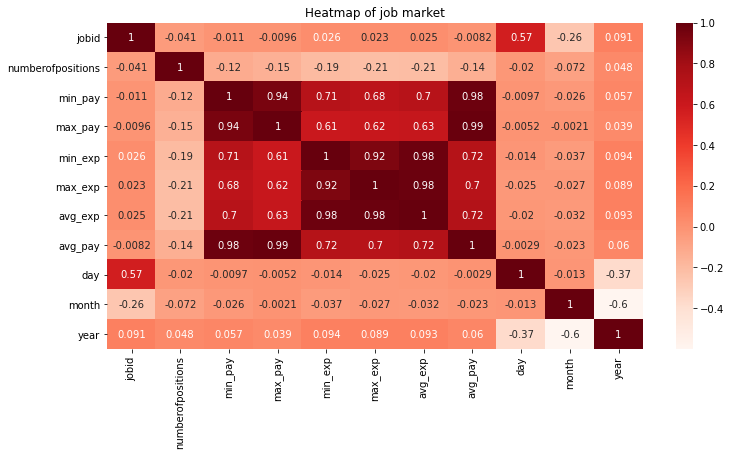

In [79]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True, cmap = "Reds")
plt.title("Heatmap of job market")
plt.show

### Companies vs Number of jobs

In [80]:
comp = df["company"].value_counts().reset_index()

In [81]:
comp

,index,company
0,Indian Institute of Technology Bombay,403
1,Confidential,393
2,National Institute of Industrial Engineering,185
3,Oracle India Pvt. Ltd.,151
4,JPMorgan Chase,135
...,...,...
8464,Brick Force Consulting Services PVT LTD,1
8465,MVN university,1
8466,Lazzaro HR Solutions Pvt. Ltd. hiring for Lead...,1
8467,Unicorn Denmart,1


In [82]:
comp.columns= ["Company", "Number of jobs" ]

In [83]:
comp

,Company,Number of jobs
0,Indian Institute of Technology Bombay,403
1,Confidential,393
2,National Institute of Industrial Engineering,185
3,Oracle India Pvt. Ltd.,151
4,JPMorgan Chase,135
...,...,...
8464,Brick Force Consulting Services PVT LTD,1
8465,MVN university,1
8466,Lazzaro HR Solutions Pvt. Ltd. hiring for Lead...,1
8467,Unicorn Denmart,1


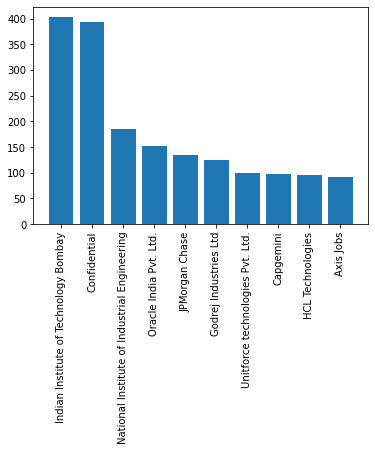

In [84]:
# Bar chart For top 10 companies 

plt.bar(comp["Company"][0:10], comp["Number of jobs"][0:10])
plt.xticks(rotation = 90)
plt.show()

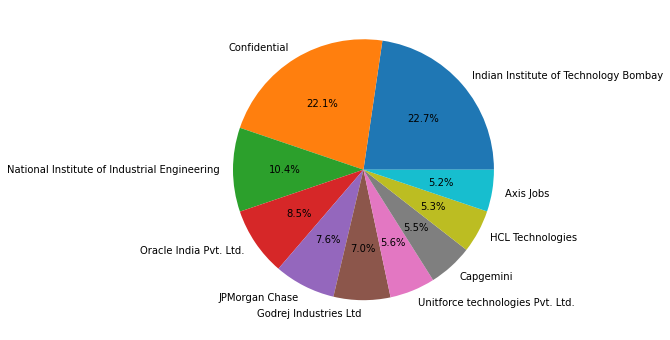

In [85]:
# Pie chart For top 10 companies 

plt.figure(figsize = (12, 6))
plt.pie(labels = comp["Company"][0:10], x = comp["Number of jobs"][0:10], autopct = "%1.1f%%")
plt.show()

### Industries vs Number of jobs

In [86]:
ind = df["industry"].value_counts().reset_index()

In [87]:
ind.columns = ["Industry", "No. of jobs"]

In [88]:
ind

,Industry,No. of jobs
0,IT-Software / Software Services,9216
1,Education / Teaching / Training,1322
2,BPO / Call Centre / ITES,1254
3,Banking / Financial Services / Broking,1238
4,Recruitment / Staffing,1129
...,...,...
58,Brewery / Distillery,4
59,Medical Devices / Equipments,4
60,Pulp and Paper,2
61,Leather,1


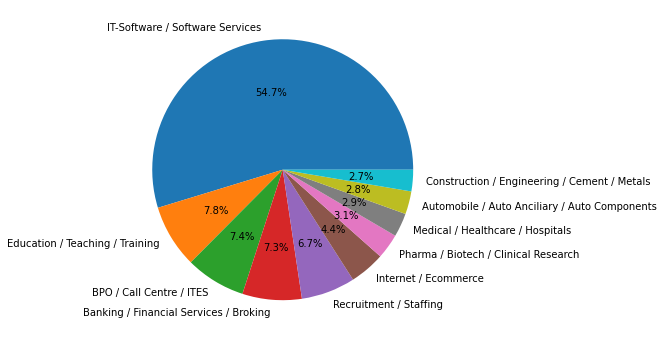

In [89]:
plt.figure(figsize = (12, 6))
plt.pie(labels = ind["Industry"][0:10], x = ind["No. of jobs"][0:10], autopct = "%1.1f%%")
plt.show()

### Job title vs Number of jobs

In [90]:
job_title = df["jobtitle"].value_counts().reset_index()

In [91]:
job_title.columns = ["Job Titles", "No. of jobs"]

<function matplotlib.pyplot.show(close=None, block=None)>

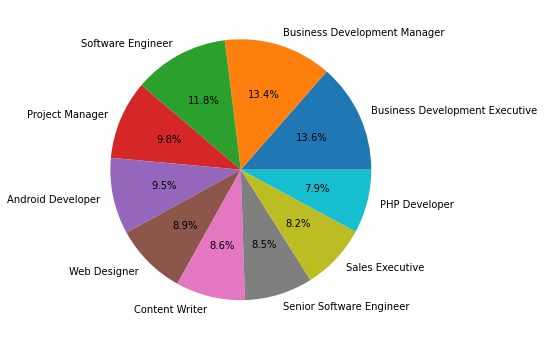

In [92]:
plt.figure(figsize = (12, 6))
plt.pie(labels = job_title["Job Titles"][0:10], x = job_title["No. of jobs"][0:10], autopct = "%1.1f%%")
plt.show

### Skills vs Number of jobs

In [93]:
skill_jobs = df["skills"].value_counts().reset_index()

In [94]:
skill_jobs.columns = ["Skills", "No. of jobs"]

<function matplotlib.pyplot.show(close=None, block=None)>

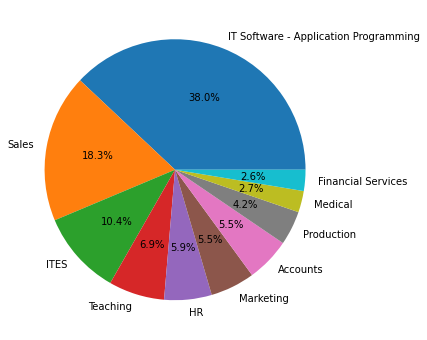

In [95]:
plt.figure(figsize = (12, 6))
plt.pie(labels = skill_jobs["Skills"][0:10], x = skill_jobs["No. of jobs"][0:10], autopct = "%1.1f%%")
plt.show

### Analyzing the relationship between minimum experience and minimum payrate

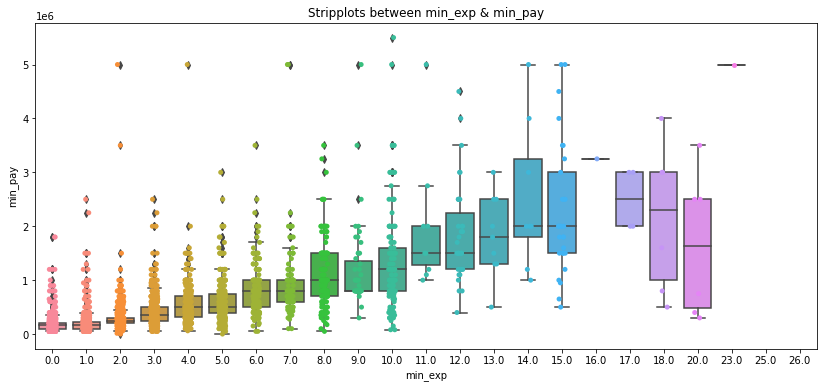

In [96]:
plt.figure(figsize = (14, 6))
sns.stripplot(x = 'min_exp', y = 'min_pay', data = df)
sns.boxplot(x = 'min_exp', y = 'min_pay', data = df)
plt.title("Stripplots between min_exp & min_pay")
plt.show()

### Analyzing the relationship between maximum experience and maximum payrate

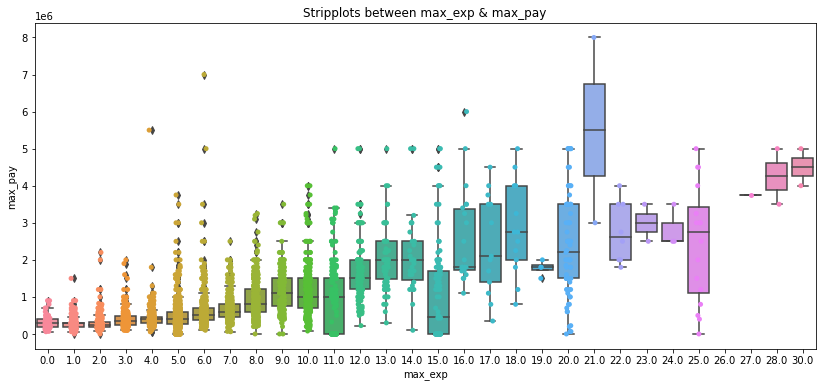

In [97]:
plt.figure(figsize = (14, 6))
sns.stripplot(x = 'max_exp', y = 'max_pay', data = df)
sns.boxplot(x = 'max_exp', y = 'max_pay', data = df)
plt.title("Stripplots between max_exp & max_pay")
plt.show()

### Median of maximum pay in different industries

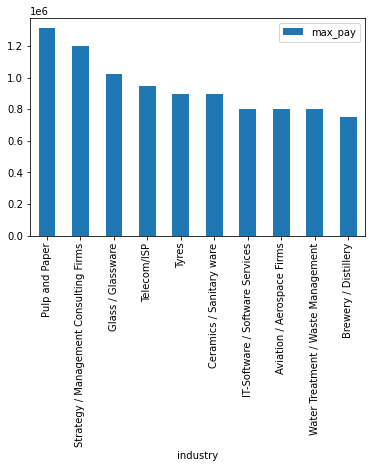

In [98]:
df[['max_pay', 'industry']].groupby("industry").median().sort_values(by = 'max_pay', ascending = False).head(10).plot.bar()
plt.show()

### Top rated skill

<function matplotlib.pyplot.show(close=None, block=None)>

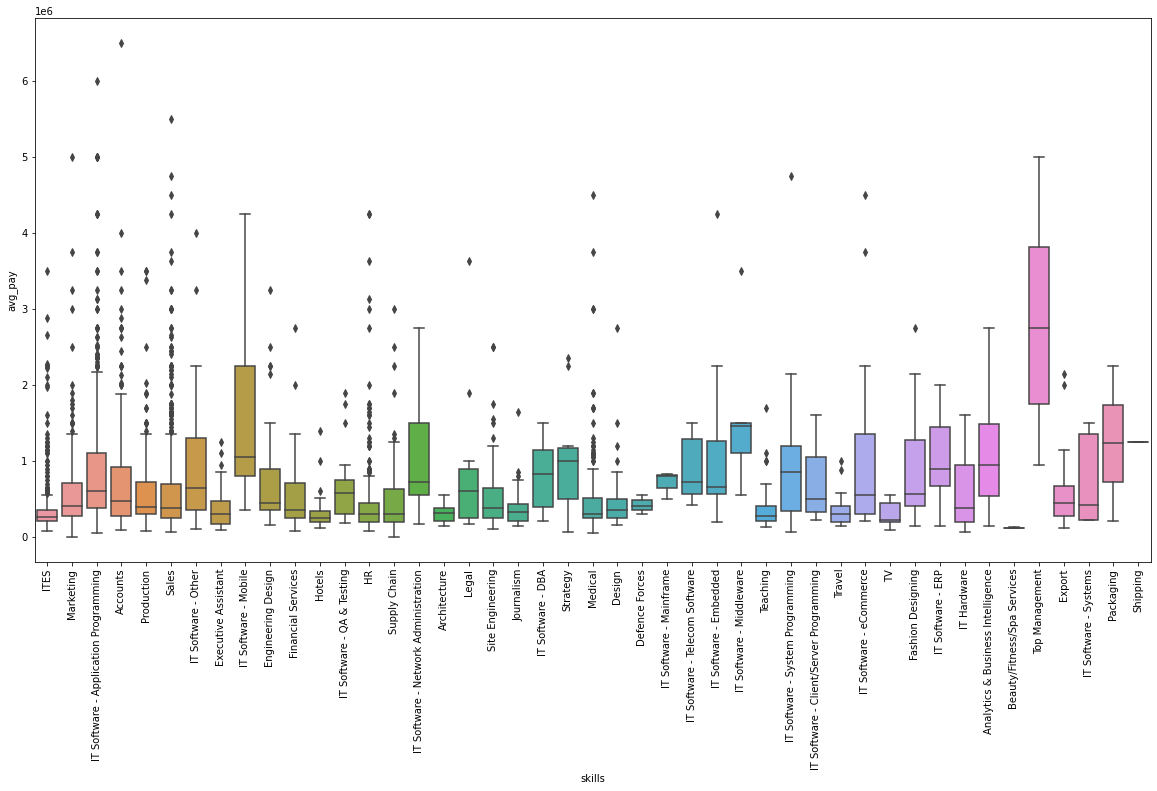

In [99]:
# All skills 

plt.figure(figsize = (20, 10))
sns.boxplot(x = 'skills', y = 'avg_pay', data = df)
plt.xticks(rotation = 90)
plt.show

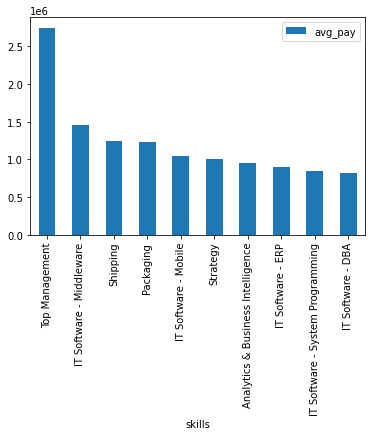

In [100]:
# Top 10 skills

df.groupby("skills")['avg_pay'].median().reset_index().sort_values(by = 'avg_pay', ascending = False).head(10).set_index('skills').plot.bar()
plt.show()

### Analysing the available position in the industry

In [101]:
df["numberofpositions"].nunique()

84

<function matplotlib.pyplot.show(close=None, block=None)>

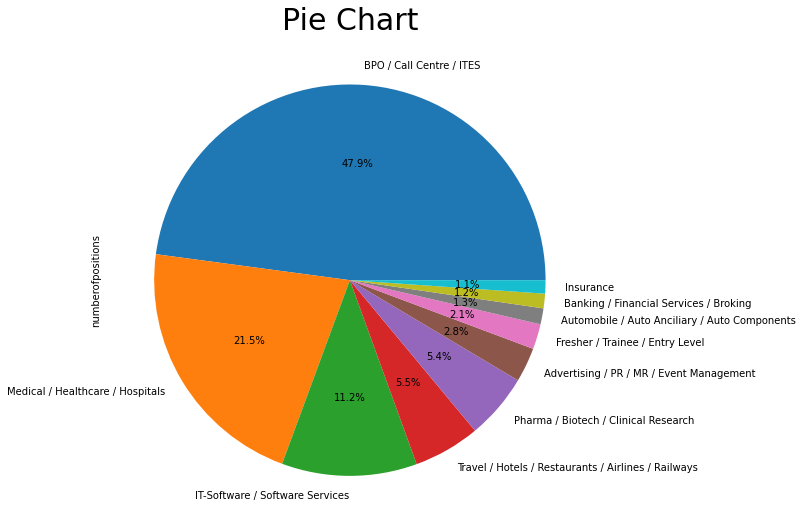

In [102]:
plt.figure(figsize = (18, 9))
df.groupby("industry")["numberofpositions"].sum().sort_values(ascending = False).head(10).plot.pie(autopct = "%1.1f%%")
plt.title("Pie Chart", fontsize = 30)
plt.show

# Summary/Insights

    - Strong correlation between average pay and experience, which means more experienced employees gets more pay.
    - IT industry has the maximum number of jobs.
    - Software Engineers and Business Development Managers job titles have more jobs among other job titles. 
    - BPO / Call Centres have the maximum number of available jobs.